# Smooth slider interaction with matplotlib and bqplot

See this Project Jupyter group thread: [Smooth interaction with graphics](https://groups.google.com/forum/#!topic/jupyter/XBhFrNDC0UQ)

## Matplotlib - flickers a lot

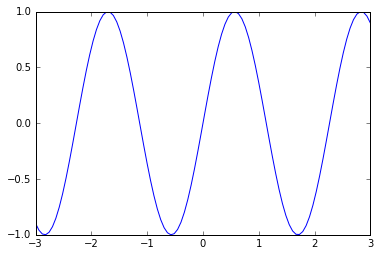

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

def myplot(a):
    xs = np.linspace(-3,3,100)
    ys = np.sin(a*xs)
    plt.plot(xs,ys)
demo = interact(myplot, a=FloatSlider(value=1, min=-3, max=3, step=0.01))

## bqplot

In [1]:
import numpy as np
import bqplot.pyplot as plt
from ipywidgets import interact, FloatSlider

fig = plt.figure()
xs = np.linspace(-3,3,100)
lines = plt.plot(xs, [])

def freq(a): 
    lines.y = np.sin(a * xs)

demo = interact(freq, a=FloatSlider(value=1, min=-3, max=3, step=0.01))
plt.ylim(-1.1,1.1)
plt.show()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Problem: get error message:

    Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
    
I ran `jupyter nbextension enable --py --sys-prefix widgetsnbextension`, but I still get the same error message.